In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def calculate_left(t, t_values, x_prev):
    arg = 3 * t
    return 0.25 * np.interp(arg, t_values, x_prev) - 2.5

In [47]:
def calculate_right(t, t_values, x_prev):
    arg = 3 * t - 2
    return 0.25 * np.interp(arg, t_values, x_prev) + 2.5

In [48]:
def calculate_middle(t, x_prev):
    x0 = x_prev[0]
    x1 = x_prev[-1]
    a = (0.75 * (x0 - x1)) + 15
    b = 0.5 * x1 - 0.25 * x0 - 7.5
    return a * t + b

In [49]:
def T(x_prev, t_values):
    x_new = np.zeros_like(x_prev)
    for i, t in enumerate(t_values):
        if t <= 1/3:
            x_new[i] = calculate_left(t, t_values, x_prev)
        elif t >= 2/3:
            x_new[i] = calculate_right(t, t_values, x_prev)
        else:
            x_new[i] = calculate_middle(t, x_prev)

    return x_new

In [50]:
def iterate(x_init, t_values, epsilon, alpha=0.5, max_iter=100):
    x_prev = x_init.copy()
    history = [x_init.copy()]
    for _ in range(max_iter):
        x_new = T(x_prev, t_values)
        diff = np.max(np.abs(x_new - x_prev))
        history.append(x_new.copy())
        if diff < epsilon * (1 - alpha) / alpha:
            break
        x_prev = x_new.copy()

    return x_new, history

In [51]:
N = 1000
t_values = np.linspace(0, 1, N)
epsilon_list = [10, 1, 1e-1, 1e-2, 1e-3]
q = 0.5

In [52]:
initial_guesses = {
    "Нулевая функция": np.zeros(N),
    "Линейная функция": t_values.copy(),
    "Квадратичная функция": t_values * t_values
}

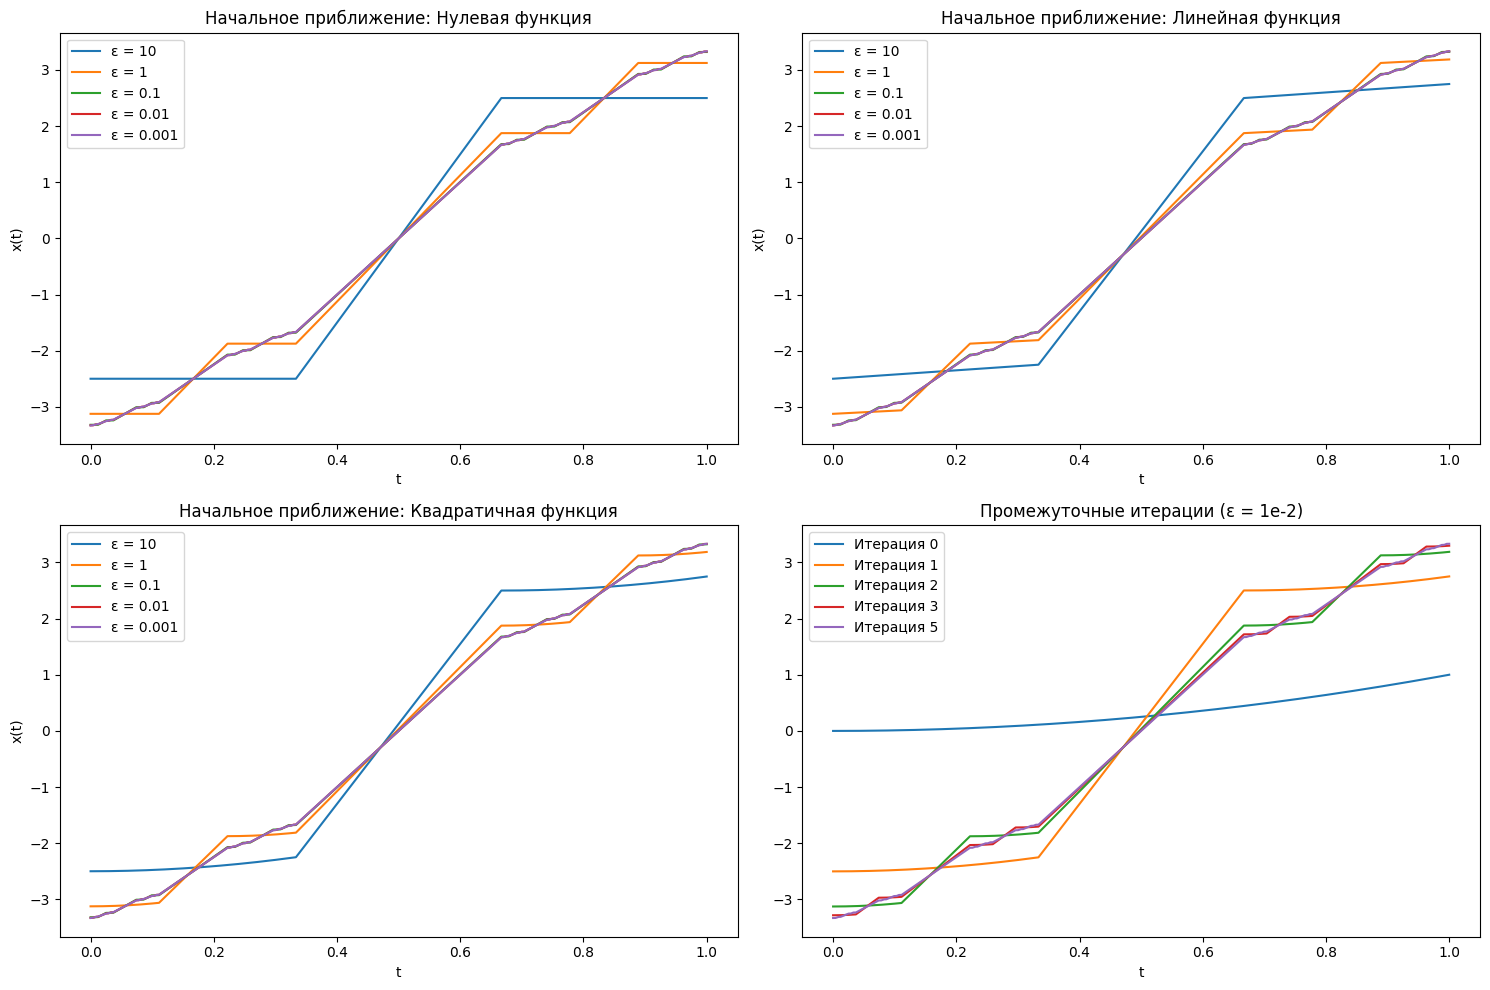

In [ ]:
plt.figure(figsize=(15, 10))
for idx, (name, x_init) in enumerate(initial_guesses.items(), 1):
    plt.subplot(2, 2, idx)
    for epsilon in epsilon_list:
        x_star, _ = iterate(x_init, t_values, epsilon, q)
        plt.plot(t_values, x_star, label=f'ε = {epsilon}')
    plt.title(f'Начальное приближение: {name}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()


plt.subplot(2, 2, 4)
x_init = initial_guesses["Квадратичная функция"]
x_star, history = iterate(x_init, t_values, 1e-2, q)
for i in [0, 1, 2, 3, len(history)-1]:
    plt.plot(t_values, history[i], label=f'Итерация {i}')
plt.title('Промежуточные итерации (ε = 1e-2)')
plt.xlabel('t')
plt.legend()

plt.tight_layout()
plt.savefig("plot.png")
plt.show()

In [54]:
# x_init = initial_guesses["Квадратичная функция"]
# x_star, history = iterate(x_init, t_values, 1e-2, q)
# plt.plot(t_values, history[3], label=f'Итерация {i}')
# plt.title('Промежуточные итерации (ε = 1e-2)')
# plt.xlabel('t')
# plt.legend()

# plt.tight_layout()
# plt.show()